In [1]:
import pandas as pd
import cv2
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout
from keras.optimizers import Adam

import tensorflow as tf

from sklearn.metrics import classification_report , confusion_matrix

In [2]:
labels = ['drowsy' , 'notdrowsy']
img_size = 224
def get_data(data_dir , labels):
    data = []

    for label in labels:
        path = os.path.join(data_dir , label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path , img))
                resized_img = cv2.resize(img_arr , (img_size , img_size))
                data.append([resized_img , class_num])
 
            except Exception as e:
                print(e)
    return data


data_dir = 'Drowsy/train_sample/'
test_dir = 'Drowsy/test_sample/'

image_data = get_data(data_dir , labels)
test_data = get_data(test_dir , labels)

In [3]:
l = [ "drowsy" if i[1] == 0 else "notdrowsy"  for i in image_data]

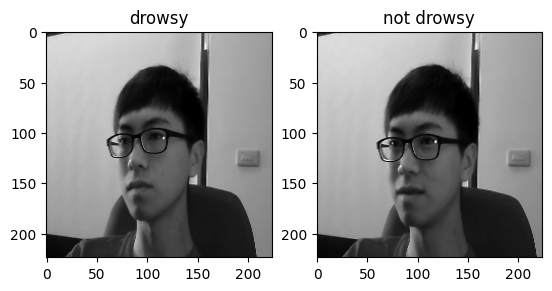

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(image_data[176][0])
plt.title("drowsy")

plt.subplot(1, 2, 2)
plt.imshow(image_data[-1][0])
plt.title("not drowsy")

plt.show()

In [6]:
X_train = []
y_train = []

X_test = []
y_test = []

for feature , label in image_data:
    X_train.append(feature)
    y_train.append(label)

for feature , label in test_data:
    X_test.append(feature)
    y_test.append(label)

In [7]:
len(X_train) , len(y_train) 

(432, 432)

In [8]:
len(X_test) , len(y_test) 

(234, 234)

In [9]:
# normalize the data

X_train = np.array(X_train) / 255
X_test =  np.array(X_test) / 255

In [10]:
X_train = X_train.reshape(-1 , img_size , img_size , 1)
y_train = np.array(y_train)

X_test = X_test.reshape(-1 , img_size , img_size , 1)
y_test = np.array(y_test)


In [11]:
train_data = []
test_data = []

for i in range(len(y_train)):
    train_data.append([X_train[i] , y_train[i]])

for i in range(len(y_test)):
    test_data.append([X_test[i] , y_test[i]])
    

In [12]:
new_X_train = []
new_y_train = []
for feature , label in train_data:
    new_X_train.append(feature)
    new_y_train.append(label)
    
new_X_test = []
new_y_test = []

for feature , label in test_data:
    new_X_test.append(feature)
    new_y_test.append(label)

In [13]:
new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)

new_X_test = np.array(new_X_test)
new_y_test = np.array(new_y_test)

In [14]:
print(len(new_X_train) , len(new_X_train))
print(len(new_X_test) , len(new_y_test))

432 432
234 234


In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(new_X_train)

In [16]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=( 224,224,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)       

In [17]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [18]:
# y_train = np.pad(y_train, (0, len(X_train) - len(y_train)), mode='constant')
# y_test = np.pad(y_test, (0, len(X_test) - len(y_test)), mode='constant')

In [19]:
history = model.fit(new_X_train,new_y_train,epochs = 500 , validation_data = (new_X_test, new_y_test))

Epoch 1/500


C:\Users\windows\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




14/14 [==============================] - 14s 701ms/step - loss: 0.7048 - accuracy: 0.3981 - val_loss: 0.6930 - val_accuracy: 0.5256
Epoch 2/500
14/14 [==============================] - 9s 623ms/step - loss: 0.6977 - accuracy: 0.4583 - val_loss: 0.6929 - val_accuracy: 0.5128
Epoch 3/500
14/14 [==============================] - 8s 608ms/step - loss: 0.6963 - accuracy: 0.4537 - val_loss: 0.6931 - val_accuracy: 0.4872
Epoch 4/500
14/14 [==============================] - 8s 611ms/step - loss: 0.6929 - accuracy: 0.5046 - val_loss: 0.6938 - val_accuracy: 0.5342
Epoch 5/500
14/14 [==============================] - 8s 601ms/step - loss: 0.6943 - accuracy: 0.4977 - val_loss: 0.6934 - val_accuracy: 0.5726
Epoch 6/500
14/14 [==============================] - 8s 602ms/step - loss: 0.6953 - accuracy: 0.4861 - val_loss: 0.6934 - val_accuracy: 0.5556
Epoch 7/500
14/14 [==============================] - 8s 602ms/step - loss: 0.6964 - accuracy: 0.4583 - val_loss: 0.6935 - val_accuracy: 0.5470
Epoch 8/

Epoch 55/500
14/14 [==============================] - 9s 652ms/step - loss: 0.6717 - accuracy: 0.6759 - val_loss: 0.6890 - val_accuracy: 0.6624
Epoch 56/500
14/14 [==============================] - 9s 638ms/step - loss: 0.6695 - accuracy: 0.6690 - val_loss: 0.6883 - val_accuracy: 0.6410
Epoch 57/500
14/14 [==============================] - 9s 642ms/step - loss: 0.6676 - accuracy: 0.7106 - val_loss: 0.6893 - val_accuracy: 0.6496
Epoch 58/500
14/14 [==============================] - 9s 645ms/step - loss: 0.6685 - accuracy: 0.6736 - val_loss: 0.6875 - val_accuracy: 0.6368
Epoch 59/500
14/14 [==============================] - 9s 643ms/step - loss: 0.6699 - accuracy: 0.6898 - val_loss: 0.6881 - val_accuracy: 0.6624
Epoch 60/500
14/14 [==============================] - 9s 649ms/step - loss: 0.6661 - accuracy: 0.6644 - val_loss: 0.6876 - val_accuracy: 0.6667
Epoch 61/500
14/14 [==============================] - 9s 648ms/step - loss: 0.6696 - accuracy: 0.6759 - val_loss: 0.6866 - val_accuracy:

Epoch 112/500
14/14 [==============================] - 11s 785ms/step - loss: 0.5985 - accuracy: 0.8264 - val_loss: 0.6804 - val_accuracy: 0.6538
Epoch 113/500
14/14 [==============================] - 11s 825ms/step - loss: 0.5940 - accuracy: 0.8426 - val_loss: 0.6774 - val_accuracy: 0.6709
Epoch 114/500
14/14 [==============================] - 12s 838ms/step - loss: 0.5942 - accuracy: 0.8495 - val_loss: 0.6770 - val_accuracy: 0.6752
Epoch 115/500
14/14 [==============================] - 12s 844ms/step - loss: 0.5952 - accuracy: 0.8287 - val_loss: 0.6747 - val_accuracy: 0.6966
Epoch 116/500
14/14 [==============================] - 10s 741ms/step - loss: 0.5933 - accuracy: 0.8565 - val_loss: 0.6765 - val_accuracy: 0.6752
Epoch 117/500
14/14 [==============================] - 11s 812ms/step - loss: 0.5922 - accuracy: 0.8241 - val_loss: 0.6756 - val_accuracy: 0.6880
Epoch 118/500
14/14 [==============================] - 11s 808ms/step - loss: 0.5880 - accuracy: 0.8519 - val_loss: 0.6762 -

14/14 [==============================] - 9s 640ms/step - loss: 0.5114 - accuracy: 0.8958 - val_loss: 0.6670 - val_accuracy: 0.6752
Epoch 169/500
14/14 [==============================] - 9s 676ms/step - loss: 0.5134 - accuracy: 0.8912 - val_loss: 0.6655 - val_accuracy: 0.6795
Epoch 170/500
14/14 [==============================] - 9s 678ms/step - loss: 0.5061 - accuracy: 0.8958 - val_loss: 0.6703 - val_accuracy: 0.6667
Epoch 171/500
14/14 [==============================] - 9s 674ms/step - loss: 0.5016 - accuracy: 0.9028 - val_loss: 0.6645 - val_accuracy: 0.6838
Epoch 172/500
14/14 [==============================] - 10s 710ms/step - loss: 0.5049 - accuracy: 0.8912 - val_loss: 0.6648 - val_accuracy: 0.6838
Epoch 173/500
14/14 [==============================] - 10s 738ms/step - loss: 0.5063 - accuracy: 0.8889 - val_loss: 0.6603 - val_accuracy: 0.7009
Epoch 174/500
14/14 [==============================] - 10s 741ms/step - loss: 0.5024 - accuracy: 0.8958 - val_loss: 0.6668 - val_accuracy: 0.6

14/14 [==============================] - 10s 688ms/step - loss: 0.4350 - accuracy: 0.9074 - val_loss: 0.6680 - val_accuracy: 0.6752
Epoch 225/500
14/14 [==============================] - 9s 664ms/step - loss: 0.4423 - accuracy: 0.9144 - val_loss: 0.6540 - val_accuracy: 0.7051
Epoch 226/500
14/14 [==============================] - 9s 659ms/step - loss: 0.4389 - accuracy: 0.9051 - val_loss: 0.6617 - val_accuracy: 0.6880
Epoch 227/500
14/14 [==============================] - 9s 673ms/step - loss: 0.4416 - accuracy: 0.9051 - val_loss: 0.6601 - val_accuracy: 0.6966
Epoch 228/500
14/14 [==============================] - 9s 665ms/step - loss: 0.4293 - accuracy: 0.9421 - val_loss: 0.6571 - val_accuracy: 0.7009
Epoch 229/500
14/14 [==============================] - 9s 663ms/step - loss: 0.4342 - accuracy: 0.9167 - val_loss: 0.6626 - val_accuracy: 0.6838
Epoch 230/500
14/14 [==============================] - 10s 687ms/step - loss: 0.4351 - accuracy: 0.9213 - val_loss: 0.6626 - val_accuracy: 0.68

14/14 [==============================] - 10s 688ms/step - loss: 0.3781 - accuracy: 0.9282 - val_loss: 0.6600 - val_accuracy: 0.7009
Epoch 281/500
14/14 [==============================] - 10s 683ms/step - loss: 0.3800 - accuracy: 0.9282 - val_loss: 0.6593 - val_accuracy: 0.7009
Epoch 282/500
14/14 [==============================] - 10s 695ms/step - loss: 0.3808 - accuracy: 0.9190 - val_loss: 0.6681 - val_accuracy: 0.6966
Epoch 283/500
14/14 [==============================] - 10s 686ms/step - loss: 0.3809 - accuracy: 0.9259 - val_loss: 0.6567 - val_accuracy: 0.7009
Epoch 284/500
14/14 [==============================] - 10s 688ms/step - loss: 0.3746 - accuracy: 0.9352 - val_loss: 0.6591 - val_accuracy: 0.7009
Epoch 285/500
14/14 [==============================] - 10s 694ms/step - loss: 0.3728 - accuracy: 0.9306 - val_loss: 0.6691 - val_accuracy: 0.6966
Epoch 286/500
14/14 [==============================] - 10s 688ms/step - loss: 0.3738 - accuracy: 0.9282 - val_loss: 0.6642 - val_accuracy:

14/14 [==============================] - 10s 686ms/step - loss: 0.3208 - accuracy: 0.9444 - val_loss: 0.6641 - val_accuracy: 0.7051
Epoch 337/500
14/14 [==============================] - 10s 689ms/step - loss: 0.3205 - accuracy: 0.9444 - val_loss: 0.6737 - val_accuracy: 0.7009
Epoch 338/500
14/14 [==============================] - 10s 685ms/step - loss: 0.3274 - accuracy: 0.9375 - val_loss: 0.6673 - val_accuracy: 0.7051
Epoch 339/500
14/14 [==============================] - 9s 667ms/step - loss: 0.3207 - accuracy: 0.9491 - val_loss: 0.6752 - val_accuracy: 0.7009
Epoch 340/500
14/14 [==============================] - 9s 668ms/step - loss: 0.3257 - accuracy: 0.9306 - val_loss: 0.6691 - val_accuracy: 0.7051
Epoch 341/500
14/14 [==============================] - 9s 675ms/step - loss: 0.3235 - accuracy: 0.9421 - val_loss: 0.6552 - val_accuracy: 0.7179
Epoch 342/500
14/14 [==============================] - 10s 689ms/step - loss: 0.3226 - accuracy: 0.9306 - val_loss: 0.6693 - val_accuracy: 0.

14/14 [==============================] - 10s 685ms/step - loss: 0.2762 - accuracy: 0.9514 - val_loss: 0.6852 - val_accuracy: 0.7094
Epoch 393/500
14/14 [==============================] - 10s 685ms/step - loss: 0.2815 - accuracy: 0.9352 - val_loss: 0.6698 - val_accuracy: 0.7179
Epoch 394/500
14/14 [==============================] - 10s 683ms/step - loss: 0.2797 - accuracy: 0.9444 - val_loss: 0.6895 - val_accuracy: 0.7051
Epoch 395/500
14/14 [==============================] - 10s 687ms/step - loss: 0.2815 - accuracy: 0.9491 - val_loss: 0.6914 - val_accuracy: 0.7051
Epoch 396/500
14/14 [==============================] - 10s 688ms/step - loss: 0.2784 - accuracy: 0.9421 - val_loss: 0.6857 - val_accuracy: 0.7137
Epoch 397/500
14/14 [==============================] - 10s 691ms/step - loss: 0.2791 - accuracy: 0.9491 - val_loss: 0.6769 - val_accuracy: 0.7179
Epoch 398/500
14/14 [==============================] - 10s 708ms/step - loss: 0.2720 - accuracy: 0.9398 - val_loss: 0.6913 - val_accuracy:

14/14 [==============================] - 9s 652ms/step - loss: 0.2544 - accuracy: 0.9468 - val_loss: 0.7111 - val_accuracy: 0.7179
Epoch 449/500
14/14 [==============================] - 9s 624ms/step - loss: 0.2465 - accuracy: 0.9560 - val_loss: 0.6937 - val_accuracy: 0.7222
Epoch 450/500
14/14 [==============================] - 9s 622ms/step - loss: 0.2489 - accuracy: 0.9444 - val_loss: 0.7108 - val_accuracy: 0.7179
Epoch 451/500
14/14 [==============================] - 9s 644ms/step - loss: 0.2530 - accuracy: 0.9329 - val_loss: 0.6965 - val_accuracy: 0.7179
Epoch 452/500
14/14 [==============================] - 9s 622ms/step - loss: 0.2471 - accuracy: 0.9514 - val_loss: 0.6981 - val_accuracy: 0.7179
Epoch 453/500
14/14 [==============================] - 9s 616ms/step - loss: 0.2464 - accuracy: 0.9468 - val_loss: 0.7129 - val_accuracy: 0.7179
Epoch 454/500
14/14 [==============================] - 9s 618ms/step - loss: 0.2457 - accuracy: 0.9421 - val_loss: 0.7040 - val_accuracy: 0.7179

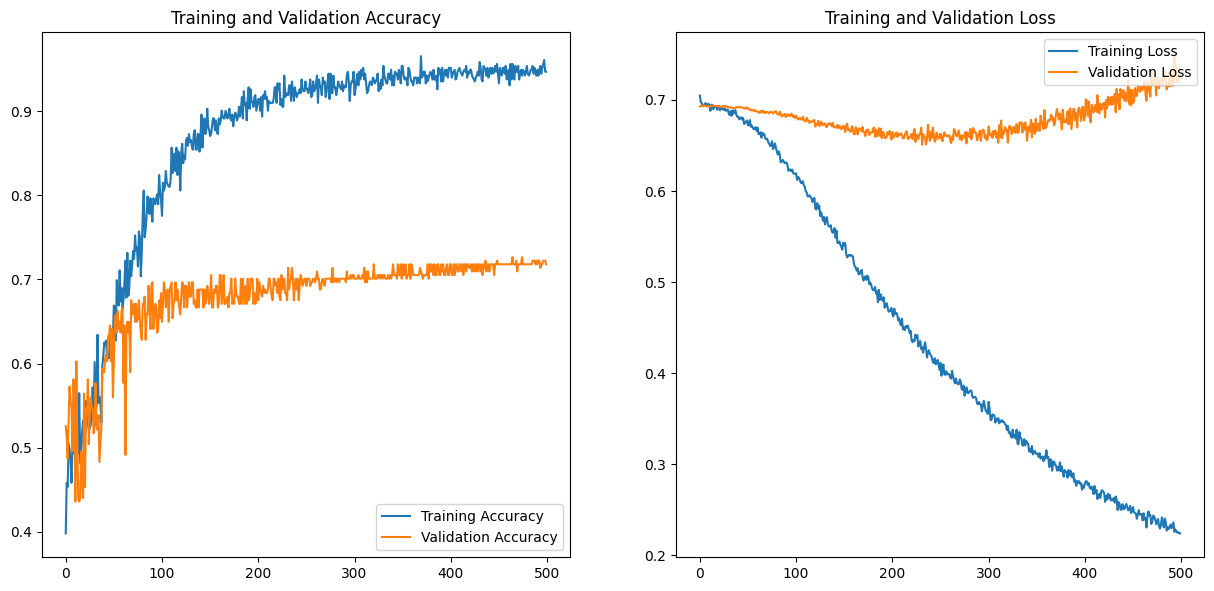

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_classes'

## Transfer Learning

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 1), include_top = False, weights = "imagenet")

ValueError: The input must have 3 channels; Received `input_shape=(224, 224, 1)`

In [24]:
base_model.trainable = False


In [25]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [26]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(new_X_train ,new_y_train ,epochs = 500 , validation_data = (new_X_test, new_y_test))

Epoch 1/500


ValueError: in user code:

    File "C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\windows\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\windows\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'mobilenetv2_1.00_224' (type Functional).
    
    Input 0 of layer "Conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 224, 224, 1)
    
    Call arguments received by layer 'mobilenetv2_1.00_224' (type Functional):
      • inputs=tf.Tensor(shape=(None, 224, 224, 1), dtype=float32)
      • training=True
      • mask=None
